## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

### Answer:


In [31]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [32]:
import os
import keras
import numpy as np

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [33]:
train, test = keras.datasets.cifar10.load_data()

In [34]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    a_max = np.max(x)
    a_min = np.min(x)
    x = 2/(a_max-a_min) * x + (-1 + 2*a_min/(a_max-a_min))    
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [35]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [36]:
"""Code Here
建立你的神經網路
"""

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [37]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [38]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [39]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.7263 - acc: 0.3925 - val_loss: 1.5523 - val_acc: 0.4478
Epoch 2/100
50000/50000 [==============================] - 6s 112us/step - loss: 1.4761 - acc: 0.4801 - val_loss: 1.4435 - val_acc: 0.4889
Epoch 3/100
50000/50000 [==============================] - 6s 117us/step - loss: 1.3543 - acc: 0.5234 - val_loss: 1.4089 - val_acc: 0.5038
Epoch 4/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.2619 - acc: 0.5541 - val_loss: 1.3810 - val_acc: 0.5124
Epoch 5/100
50000/50000 [==============================] - 5s 104us/step - loss: 1.1805 - acc: 0.5852 - val_loss: 1.3455 - val_acc: 0.5290
Epoch 6/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.0993 - acc: 0.6143 - val_loss: 1.3740 - val_acc: 0.5243
Epoch 7/100
50000/50000 [==============================] - 5s 102us/step - loss: 1.0271 - acc: 0.6370 - val_loss: 1.

50000/50000 [==============================] - 5s 99us/step - loss: 0.1067 - acc: 0.9653 - val_loss: 3.6223 - val_acc: 0.5274
Epoch 60/100
50000/50000 [==============================] - 5s 95us/step - loss: 0.0959 - acc: 0.9679 - val_loss: 3.6792 - val_acc: 0.5282
Epoch 61/100
50000/50000 [==============================] - 5s 96us/step - loss: 0.0961 - acc: 0.9688 - val_loss: 3.7311 - val_acc: 0.5265
Epoch 62/100
50000/50000 [==============================] - 5s 97us/step - loss: 0.0896 - acc: 0.9700 - val_loss: 3.6941 - val_acc: 0.5269
Epoch 63/100
50000/50000 [==============================] - 5s 97us/step - loss: 0.0933 - acc: 0.9695 - val_loss: 3.7535 - val_acc: 0.5301
Epoch 64/100
50000/50000 [==============================] - 5s 97us/step - loss: 0.0943 - acc: 0.9687 - val_loss: 3.7990 - val_acc: 0.5206
Epoch 65/100
50000/50000 [==============================] - 5s 98us/step - loss: 0.1083 - acc: 0.9652 - val_loss: 3.6704 - val_acc: 0.5290
Epoch 66/100
50000/50000 [==============

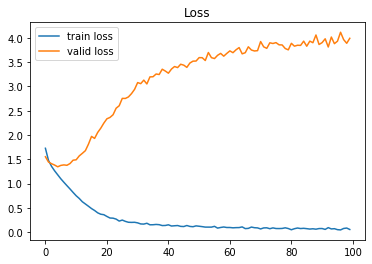

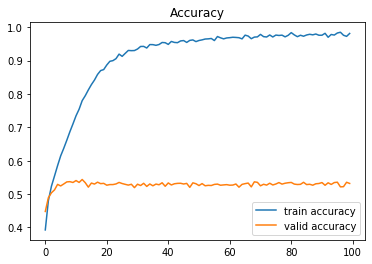

In [40]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()